The used dataset, is a public Kaggle dataset. [Dataset](https://www.kaggle.com/datasets/legendahmed/alzheimermridataset)

In [1]:
!unrar x -Y "/content/dataset.rar" "/content/" # Decompressing the dataset

Se han truncado las últimas 5000 líneas del flujo de salida.
Extracting  /content/dataset/train/MildDemented/mildDem210.jpg            55%  OK 
Extracting  /content/dataset/train/MildDemented/mildDem211.jpg            55%  OK 
Extracting  /content/dataset/train/MildDemented/mildDem212.jpg            55%  OK 
Extracting  /content/dataset/train/MildDemented/mildDem213.jpg            55%  OK 
Extracting  /content/dataset/train/MildDemented/mildDem214.jpg            55%  OK 
Extracting  /content/dataset/train/MildDemented/mildDem215.jpg            55%  OK 
Extracting  /content/dataset/train/MildDemented/mildDem216.jpg            55%  OK 
Extracting  /content/dataset/train/MildDemented/mildDem217.jpg            55%  OK 
Extracting  /content/dataset/train/MildDemented/mildDem218.jpg            55%  OK 
Extracting  /content/dataset/train/MildDemented/mildDem219.jpg            55%  OK 
Extracting  /conten

In [2]:
# Important paths
train_path = '/content/dataset/train'
test_path = '/content/dataset/validation'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.imagenet_utils import preprocess_input

width_shape = 48 # Image width
height_sape = 48 # Image height
num_labels = 4 # Number of classification labels
epochs = 15
batch_size = 100
label_names = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

In [6]:
# Training and testing dataset configuration
training_dataset = ImageDataGenerator()
testing_dataset = ImageDataGenerator()

trainging_gen = training_dataset.flow_from_directory(
    train_path,
    target_size=(width_shape, height_sape),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical', shuffle=True)

testing_gen = testing_dataset.flow_from_directory(
    test_path,
    target_size=(width_shape, height_sape),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical', shuffle=True)

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [7]:
# Defining the architecture
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input, AveragePooling2D,Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()

# Convolutional layer 1
model.add(Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu", strides=1, input_shape = (width_shape, height_sape, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Convolutional layer 2
model.add(Conv2D(64, kernel_size=(5, 5), padding="same", activation="relu", strides=1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Convolutional layer 3
model.add(Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu", strides=1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Convolutional layer 4
model.add(Conv2D(256, kernel_size=(3, 3), padding = "same", activation="relu", strides=1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Convolution layer 5
# Convolutional layer 4
model.add(Conv2D(512, kernel_size=(3, 3), padding = "same", activation="relu", strides=1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Data conversion
model.add(Flatten())

# Layer 6
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Classification
model.add(Dense(num_labels, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        51264     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       2

In [9]:
# Compilation and optimization
optimizer = Adam(learning_rate=0.001, decay=1e-4 / epochs) # learning_rate=1e-4
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# Decay parameter is how the learning_reate goes down in order not to miss the optimal point.
# In other words, the program has to decay learning rate to have more accurate steps by reducing the learning rate.

In [10]:
# TensorBoard
from tensorflow.keras.callbacks import TensorBoard
import datetime, os

%load_ext tensorboard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
callbacks = TensorBoard(logdir, histogram_freq=1)

In [11]:
# Training
model.fit(
    trainging_gen,
    epochs=epochs,
    validation_data=testing_gen,
    steps_per_epoch=trainging_gen.n//batch_size,
    validation_steps=testing_gen.n//batch_size,
    callbacks=[callbacks]
)

Epoch 1/15
51/51 [==============================] - 87s 2s/step - loss: 1.1591 - accuracy: 0.5099 - val_loss: 2.0039 - val_accuracy: 0.5000
Epoch 2/15
51/51 [==============================] - 103s 2s/step - loss: 1.0109 - accuracy: 0.5437 - val_loss: 1.4819 - val_accuracy: 0.5425
Epoch 3/15
51/51 [==============================] - 101s 2s/step - loss: 0.9290 - accuracy: 0.5740 - val_loss: 1.2021 - val_accuracy: 0.5225
Epoch 4/15
51/51 [==============================] - 93s 2s/step - loss: 0.8734 - accuracy: 0.5951 - val_loss: 0.9902 - val_accuracy: 0.5942
Epoch 5/15
51/51 [==============================] - 99s 2s/step - loss: 0.7996 - accuracy: 0.6337 - val_loss: 0.8969 - val_accuracy: 0.5908
Epoch 6/15
51/51 [==============================] - 88s 2s/step - loss: 0.7675 - accuracy: 0.6511 - val_loss: 0.9364 - val_accuracy: 0.5933
Epoch 7/15
51/51 [==============================] - 81s 2s/step - loss: 0.7202 - accuracy: 0.6694 - val_loss: 1.0665 - val_accuracy: 0.5900
Epoch 8/15
51/51 [

https://www.codificandobits.com/blog/tutorial-clasificacion-imagenes-redes-convolucionales-python/#entrenamiento-y-validaci%C3%B3n-del-modelo

In [12]:
score = model.evaluate(testing_gen, verbose=0)
# Returns the loss value and metrics values for the model in test mode
print("Score = ", score)

Score =  [1.1706877946853638, 0.6442533135414124]


In [13]:
# Performance graphic
%tensorboard --logdir logs

# Pink = validation
#Green = Train

<IPython.core.display.Javascript object>

In [14]:
# Simple test
from tensorflow.keras.models import load_model
import cv2 
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

test_faces = []

pic_path = "/content/dataset/validation/ModerateDemented/30.jpg"

test_face = cv2.cvtColor(cv2.imread(pic_path), cv2.COLOR_BGR2GRAY)
test_face = cv2.resize(test_face, (48, 48))
test_face2 = img_to_array(test_face)
test_face2 = np.expand_dims(test_face2, axis=0)
test_faces.append(test_face2)
prediction = model.predict(test_faces)

1/1 [==============================] - 0s 195ms/step


VeryMildDemented


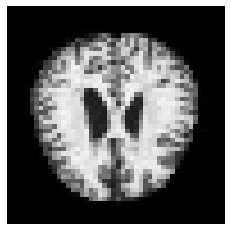

In [15]:
print(label_names[np.argmax(prediction)])
plt.imshow(cv2.cvtColor(np.asarray(test_face), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Found 1279 images belonging to 4 classes.
13/13 [==============================] - 6s 427ms/step


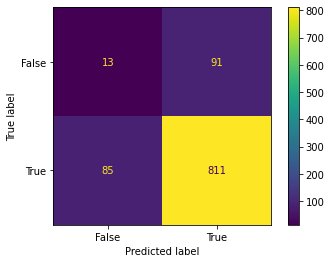

In [19]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

test_data_gen = ImageDataGenerator()
testing_gen = test_data_gen.flow_from_directory(
    test_path,
    target_size=(width_shape, height_sape),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical', shuffle=False)

predictions = model.predict(testing_gen)
y_pred = np.random.binomial(1, .9, size=1000)
y_real = np.random.binomial(1, .9, size=1000)
confusion = confusion_matrix(y_real, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=[False, True])
cm_display.plot()
plt.show()

# Quadrants of the confusion matrix:

Top-left -> True negative

Top-right -> False positive

Bottom-left -> False negative

Bottom-right -> True positive

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_real, y_pred))

              precision    recall  f1-score   support

           0       0.13      0.12      0.13       104
           1       0.90      0.91      0.90       896

    accuracy                           0.82      1000
   macro avg       0.52      0.52      0.52      1000
weighted avg       0.82      0.82      0.82      1000



In [21]:
# Saving the model inside a "h5" file
model.save("EmotionDetector.h5")
# An "h5" file, is a file that contents a big amount of numeric, graphic and text data.

In [22]:
# Accuracy calculation according to the confusion matrix results.
def accuracy_calculation(true_negative, false_positive, false_negative, true_positive):
  accuracy = (true_negative + true_positive) / (true_negative + false_positive + false_negative + true_positive)
  return accuracy * 100

def error_rate_calculation(true_negative, false_positive, false_negative, true_positive):
  error_rate = (false_positive + false_negative) / (true_negative + false_positive + false_negative + true_positive)
  return error_rate * 100

success_rate = accuracy_calculation(11, 86, 83, 820)
error_rate = error_rate_calculation(11, 86, 83, 820)

print("Accuracy = ", "{:.2f}".format(success_rate), "%")
print("Error rate = ", "{:.2f}".format(error_rate), "%")


Accuracy =  83.10 %
Error rate =  16.90 %
